<a href="https://colab.research.google.com/github/kdh4672/economy_ai/blob/main/ai_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EC5320 Week6a codes: Time series future prediction (Facebook Prophet)

2022.4.6.<br>

Author: Hyunjoo Yang (hyang@sogang.ac.kr)<br><br>

This notebook uses Facebook's Prophet to predict future stock prices.<br><br>

For Facebook's Prophet, refer to:<br>
https://facebook.github.io/prophet/ <br><br>

Codes are based on: <br>
https://github.com/PinkWink/DataScience/blob/master/source_code/07.%20Time%20Series%20Data%20Handle.ipynb <br>

# 1. Import

In [ ]:
!pip install finance-datareader
!pip install pyts

     |████████████████████████████████| 48 kB 2.6 MB/s 


In [ ]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from datetime import datetime
import FinanceDataReader as fdr

# 2. Data preparation

In [85]:
# S&P 지수 1997~2016을 train으로 load
# S&P 지수 2017~2022를 train으로 load

df = fdr.DataReader('SPY', '1997','2016')
test_df = fdr.DataReader('SPY', '2017','2022')

In [88]:
# check dtypes of variables
print(df.dtypes)
df

Close     float64
Open      float64
High      float64
Low       float64
Volume    float64
Change    float64
dtype: object


,Close,Open,High,Low,Volume,Change
Date,,,,,,
1997-01-02,74.03,74.38,74.38,72.75,2030000.0,0.0026
1997-01-03,75.09,74.38,75.12,74.08,2120000.0,0.0143
1997-01-06,74.44,75.09,75.44,74.31,1370000.0,-0.0087
1997-01-07,75.34,74.44,75.47,74.12,939000.0,0.0121
1997-01-08,74.69,75.75,75.78,74.69,1800000.0,-0.0086
...,...,...,...,...,...,...
2015-12-24,205.68,205.72,206.33,205.42,48540000.0,-0.0017
2015-12-28,205.21,204.86,205.26,203.94,65900000.0,-0.0023
2015-12-29,207.40,206.51,207.79,206.47,92640000.0,0.0107


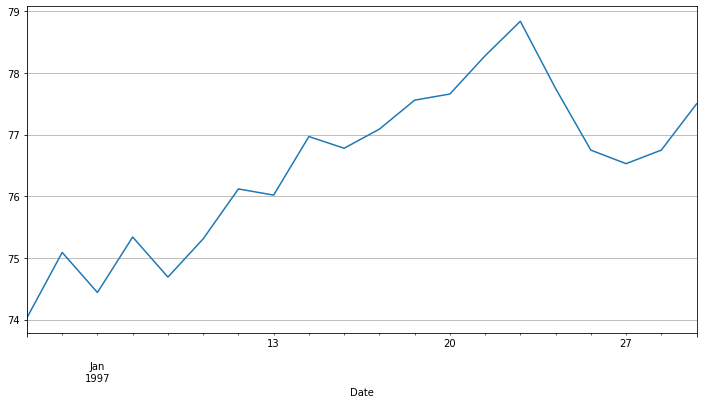

In [89]:
x_data = df[0:20]['Close']
x_data.plot(figsize=(12,6), grid=True);

In [73]:
i = 0
label_list = []
new_df = pd.DataFrame(columns=['Close', 'Label'])
while True:
  x_data = [df[i:i+20]['Close'].values]
  if i == 0 :
    new_data = np.array(x_data)
  else:
    new_data = np.concatenate((new_data,np.array(x_data)),axis=0)
  if i==2:
    break
  try:
    change = df.iloc[i+20]['Change']
  except:
    break
  if change <= 0 :
    label = 0
  if change > 0 :
    label = 1
  label_list.append(label)
  i += 1
# print(x_data_list[0])
# print(label_list[0])
# print(new_df.shape)

     |████████████████████████████████| 2.5 MB 5.4 MB/s 


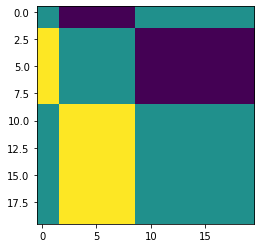

In [74]:
# print(x_data_list[0].values)
from pyts.image import GramianAngularField
from matplotlib.pyplot import imshow
transformer = GramianAngularField(method='difference')
X_train_GAF = transformer.fit_transform(new_data)
X_train_GAF.shape
imshow(X_train_GAF[0])

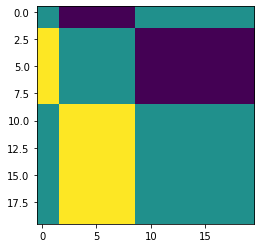

In [77]:
# plot closing stock prices 
X_train_GAF_L = (((X_train_GAF + 1) / 2)*255).astype(int)
imshow(X_train_GAF_L[0])

In [81]:
np.min(X_train_GAF_L), np.max(X_train_GAF_L)

(17, 237)

In [82]:
!mkdir gaf_images
root_folder = 'gaf_images'

# 3. Train (fit)

In [30]:
root_folder = '/content/drive/MyDrive/2022_AI와빅데이터를활용한경제정보처리/4차시/gaf_images'

# save train set images (e.g., train/class_name/0.png)

for i in range(len(y_train)):
    
    # define file names
    image_file_name = str(i) + '.png'

    # define folder names
    class_folder_name = str(y_train[i])
    full_path = os.path.join(root_folder, 'train')
    full_path = os.path.join(full_path, class_folder_name)
    
    # make folders
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    # save images
    image_file_name_with_full_path = os.path.join(full_path, image_file_name)
    plt.imsave(image_file_name_with_full_path, X_train_GAF_L[i])

NameError: ignored

In [ ]:
# create a final train dataset for training

df = pd.DataFrame({'ds':df_mystock_trunc.index, 'y':df_mystock_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df

In [ ]:
# train using Prophet

myprophet = Prophet()
myprophet.fit(df)

# 4. Predict future

In [ ]:
# create future periods

future = myprophet.make_future_dataframe(periods=365)
future

In [ ]:
# predict

forecast = myprophet.predict(future)
forecast

In [ ]:
# plot forecast

myprophet.plot(forecast);

In [ ]:
# plot components of forecast

myprophet.plot_components(forecast);

In [ ]:
# compare actual and forecast

plt.figure(figsize=(12,6))
plt.plot(df_mystock.index, df_mystock['Close'], label='actual')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()